In [11]:
import pickle
from dataprocessing import load_data
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from xgboost import plot_importance
import shap
import pandas as pd
%matplotlib inline

In [12]:
with open("model4.pickle","rb") as picklefile:
    model = pickle.load(picklefile)

## Finding the right threshold

With our current 0.5 probability threshold, we are doing poorly in classificaiton. If we tweaked the threshold to another number, perhaps we would be doing a better job at predicting

In [13]:
X_train, X_test, y_train, y_test = load_data("../data/healthcare-dataset-stroke-data.csv")

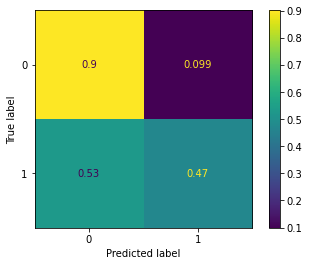

In [14]:

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions,normalize = 'true', labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot() 


Threshold: 0.05
Threshold: 0.1
Threshold: 0.2
Threshold: 0.3
Threshold: 0.4
Threshold: 0.5
Threshold: 0.6
Threshold: 0.7
Threshold: 0.8
Threshold: 0.9
Threshold: 1


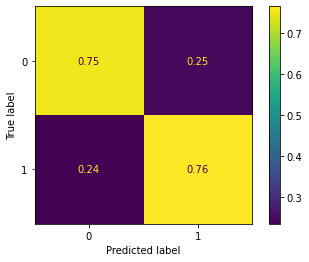

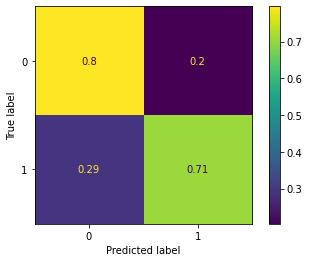

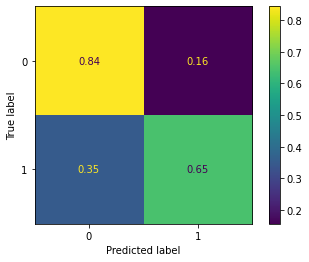

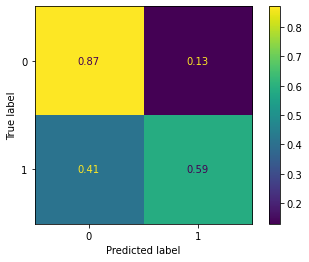

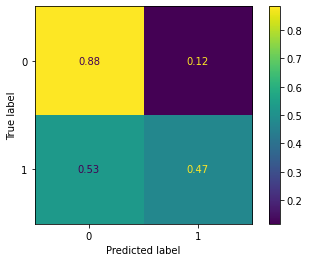

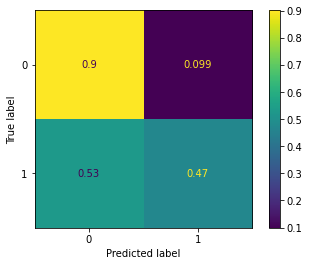

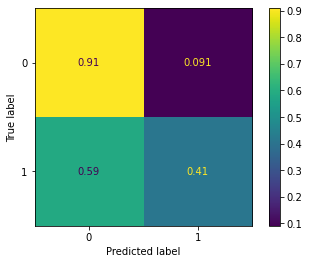

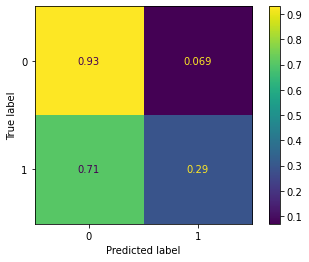

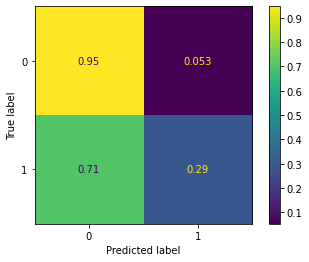

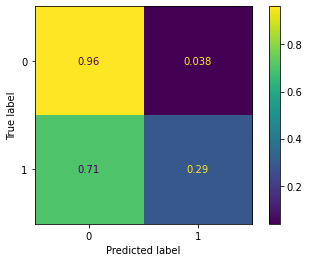

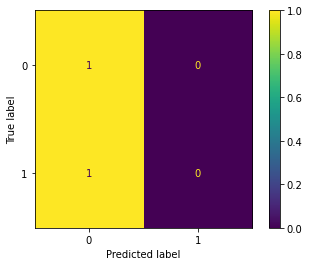

In [15]:
prediction_probas = model.predict_proba(X_test)[:,-1]



thresholds = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

for i in thresholds:
    rounded_prediction = np.where(prediction_probas >= i , 1, 0)
    print("Threshold: {}".format(i))
    cm =  confusion_matrix(y_test,rounded_prediction,labels = model.classes_,normalize = 'true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=model.classes_)
    disp.plot()


Threshold: 0.01
Threshold: 0.02
Threshold: 0.03
Threshold: 0.04
Threshold: 0.05
Threshold: 0.06
Threshold: 0.07
Threshold: 0.08
Threshold: 0.09
Threshold: 0.1


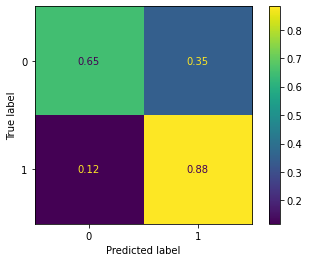

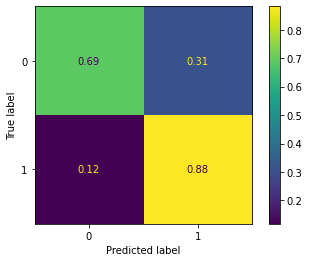

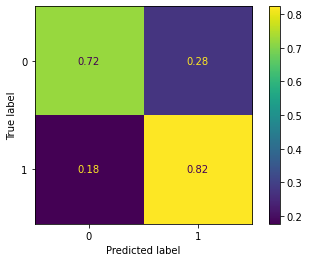

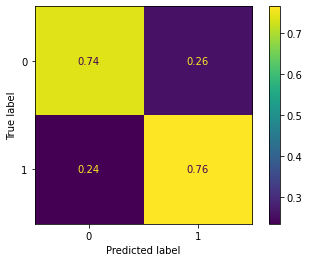

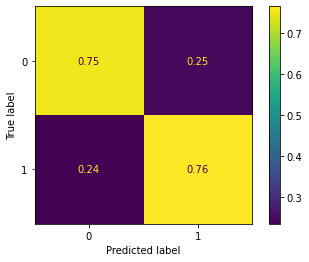

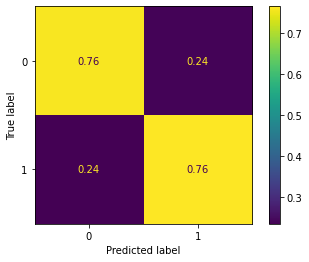

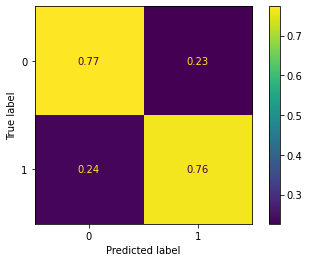

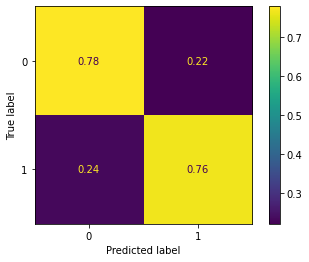

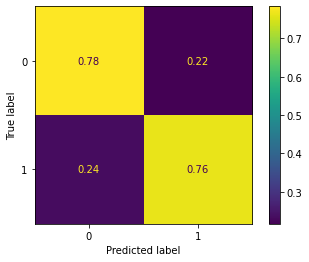

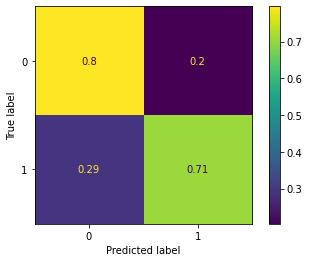

In [16]:
prediction_probas = model.predict_proba(X_test)[:,-1]



thresholds = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]

for i in thresholds:
    rounded_prediction = np.where(prediction_probas >= i , 1, 0)
    print("Threshold: {}".format(i))
    cm =  confusion_matrix(y_test,rounded_prediction,labels = model.classes_,normalize = 'true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=model.classes_)
    disp.plot()


## Seems like the golden mark for our classifying threshhold is 0.08, it has the best confusion matrix, with and 82% true pos rate and an 81% true neg rate



## Feature importance

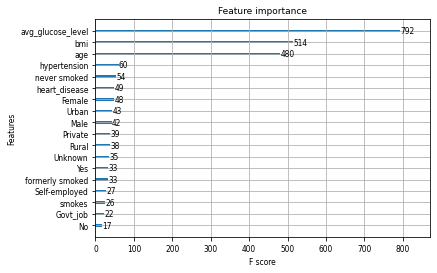

In [8]:
plt.rcParams.update({'font.size': 7.5})
ax = plot_importance(model['pred'])


## Seems like the most important features is avg_glucose_level, age , bmi, its important to stay healthy, and young!


## Lets plot SHAP values and see what

In [9]:
explainer = shap.TreeExplainer(model["pred"])
cleaned_data = pd.read_csv("../data/cleaned_data.csv")
cleaned_data.index = pd.Index(cleaned_data["Unnamed: 0"],name = "ID")
cleaned_data.drop(columns = ["Unnamed: 0"],axis = 1, inplace = True)

shap_values = explainer.shap_values(cleaned_data)
shap.initjs()
shap.summary_plot(shap_values,cleaned_data,plot_type='bar')

ValueError: This reshape error is often caused by passing a bad data matrix to SHAP. See https://github.com/slundberg/shap/issues/580

In [10]:
shap.summary_plot(shap_values,cleaned_data)

NameError: name 'shap_values' is not defined

## To avoid strokes, be young and keep healthy, don't smoke, live in rural areas!